# Suicide Rate Prediction:
    
    Suicide is a serious public health problem. The issue of  suicide rates is becoming more and more pervasive in society.The World Health Organization (WHO) estimates that nearly 800,000 people commit suicide each year, based on historical data from 1985 to 2016. This is one person every 40 seconds and there are suicide attempts.
    The objective of this project is to predict the suicide rates using Machine Learning algorithms and analyzing them.


# The steps followed in this project are:

1.Loading the data 
2.Familiarizing with the data
3.Data Preprocessing
4.Visualizing the data
5.Splitting the data
6.Training the data
7.Conclusion

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# 1. Loading the data

 The dataset is taken from Kaggle, https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016. 
This dataset contains the suicide details of all the countries from year 1985 to 2016. The dataset contains 12 features with 27820 samples.

In [2]:
#loading the data
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# 2. Familiarizing with data:

    Here we look the data and it's features.

In [3]:
#shape of the dataframe
df.shape

(27820, 12)

In [4]:
#list all the features of the data
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
#Here we find the age groups of the people and the count of age groups.
df.age.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [7]:
#Here we find the total number of countries in our dataset
country = df.country.unique()
print("Number of countries:", len(country))

Number of countries: 101


# Observations:
    1. The total number of countries in the dataset are 101.
    2. HDI for year feature has null values. So we will replace the null values with mean in the pre processing.
    3. There are 6 different age groups of people.

# 3. Data Preprocessing:

    In Data Preprocessing we clean the data and apply the preprocessing techniques to transform the data.

In [8]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [9]:
#Here we check the missing values
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [10]:
#Here we found the HDI column has 19456 null values.
df.isna().head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False


In [11]:
#we use the mean of HDI column to replace the null values of the HDI column.
x = df['HDI for year'].mean()

In [12]:
x

0.7766011477761785

In [13]:
#Replace the null values with mean of HDI.
df['HDI for year'].fillna(x, inplace = True)

In [14]:
#Data after replacing the null values.
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675000,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation Z


In [15]:
#Information of the new data after replacing the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        27820 non-null  float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [16]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [17]:
#Here Country-year column is the combination of both the year and country so we drop the column.
df = df.drop(['country-year'], axis = 1)
df.shape

(27820, 11)

In [18]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [19]:
#Shape of the data after dropping the column and null rows.
df = df.dropna()
df.shape

(27820, 11)

# 4. Visualizing the data

    Graphs are displayed to check how the data is distributed.

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'suicides_no'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'suicides/100k pop'}>],
       [<AxesSubplot:title={'center':'HDI for year'}>,
        <AxesSubplot:title={'center':'gdp_per_capita ($)'}>]],
      dtype=object)

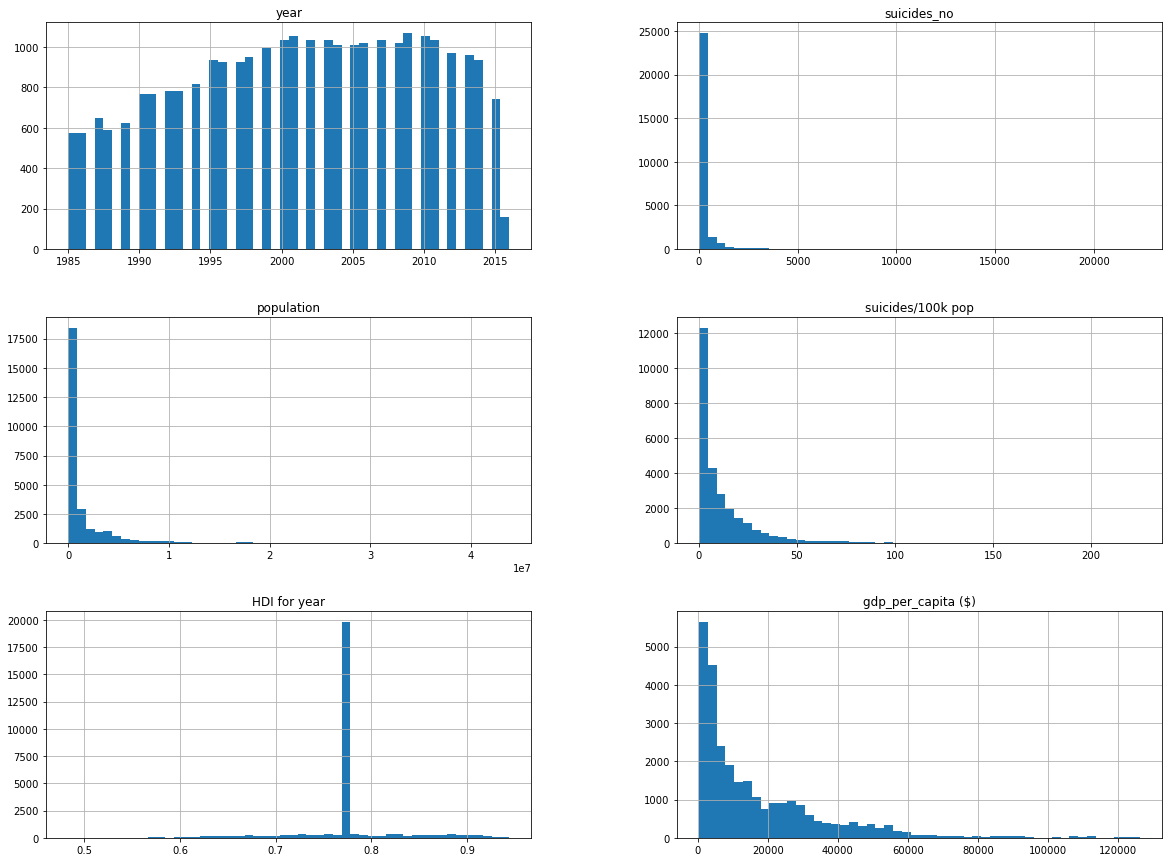

In [20]:
#Plotting the histogram for the data.
df.hist(bins = 50,figsize = (20,15))

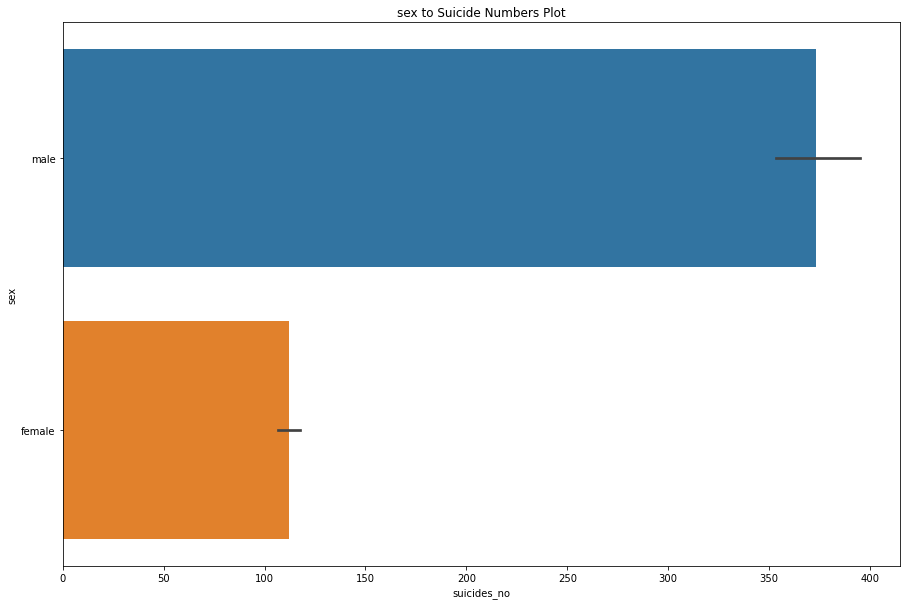

In [21]:
#Plotting the bar chart for the Number of suicides and Sex.
plt.figure(figsize=(15,10))
sns.barplot(x = "suicides_no", y = "sex", data = df)
plt.title('sex to Suicide Numbers Plot')
plt.show()

Here we can see that suicides in the male population is more compared to females.

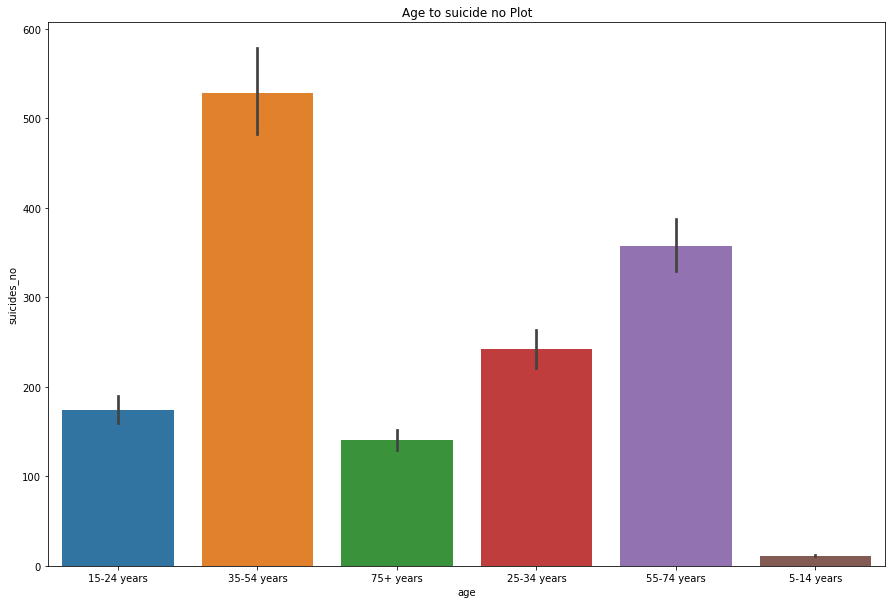

In [22]:
#Here we plot the bar chart to the number of suicides to the age.
plt.figure(figsize=(15,10))
sns.barplot(x = "age", y = "suicides_no", data = df)
plt.title("Age to suicide no Plot")
plt.show()

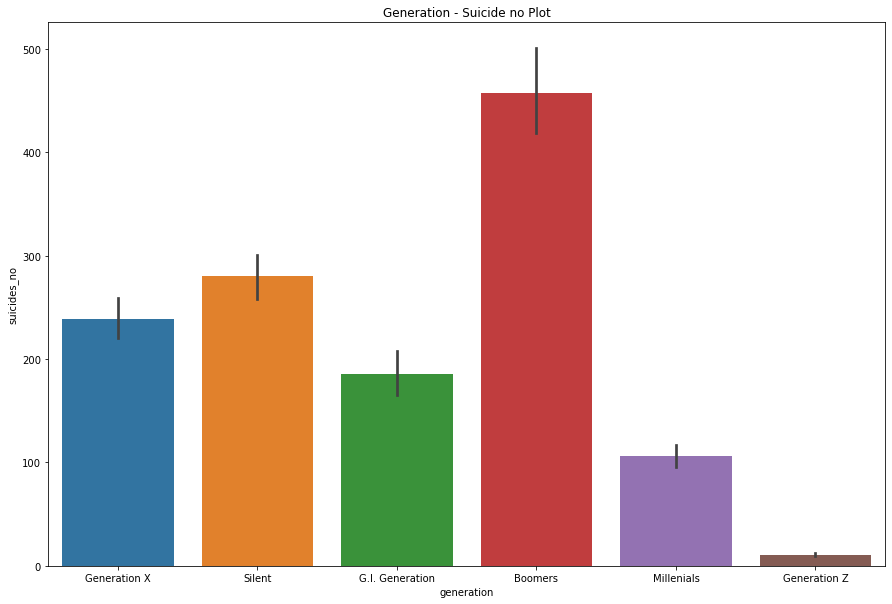

In [23]:
#Here we plot the bar chart for suicides numbers to the generations
plt.figure(figsize=(15,10))
sns.barplot(x = "generation", y = "suicides_no", data = df)
plt.title('Generation - Suicide no Plot')
plt.show()

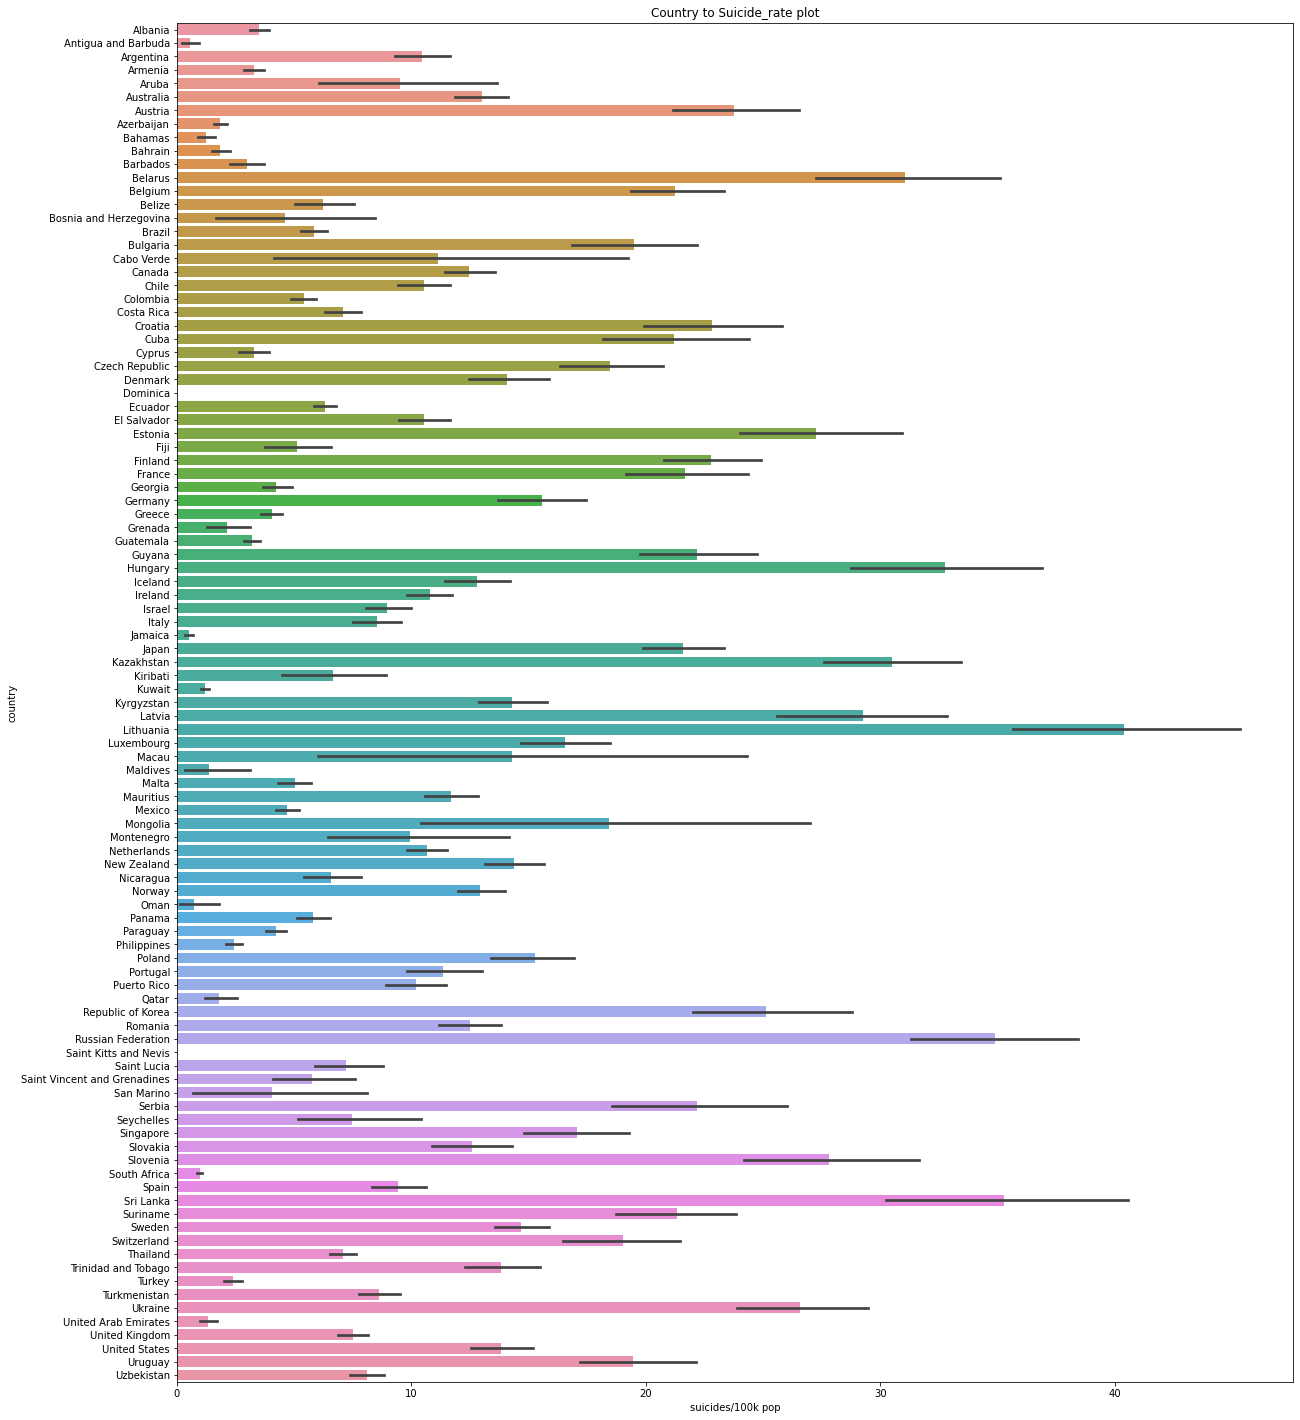

In [24]:
#Here we plot the bar chart to the number of suicide to countries.
plt.figure(figsize=(20,25))
sns.barplot(x = "suicides/100k pop", y = "country", data = df)
plt.title('Country to Suicide_rate plot')
plt.show()

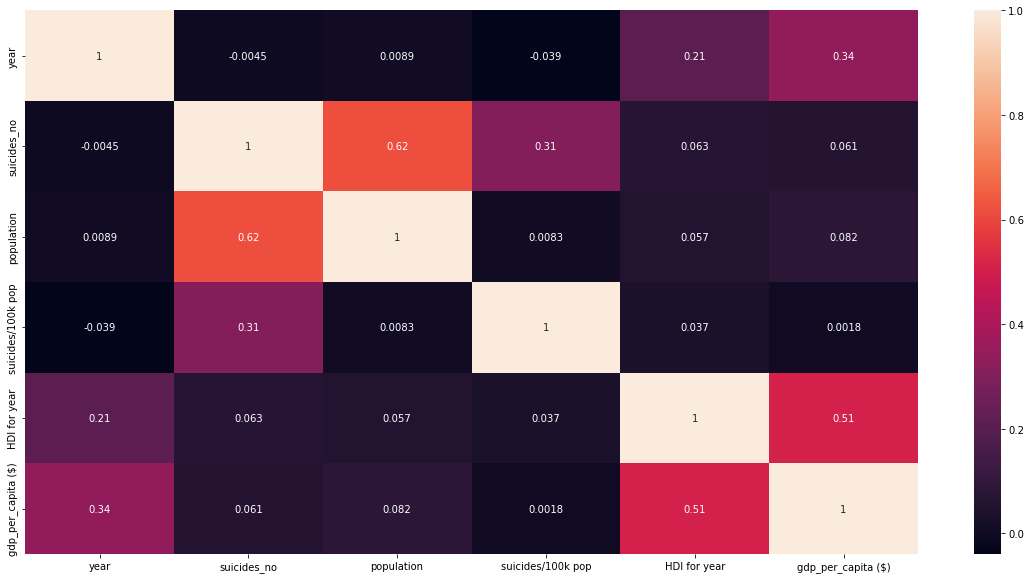

In [25]:
#Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Observations: 
    1. The number of suicides in male population is higher than that of the female population.
    2. The age group of people between 35-54 years are commiting more suicides.
    3. In generations, boomers generation has more number of suicides.
    4. From the bar chart we can see Lithuania country has more number of suicides.

In [26]:
#The non-numerical labeled columns, country, year, sex, age and generation are to be converted to numerical labels that can be done by using SkLearn's LabelEncoder.
from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age', 'sex', 'generation']
label = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    df[column] = label.fit_transform(df[column])

In [27]:
data = df.copy()
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,2,1,0,21,312900,6.71,0.776601,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,0.776601,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,0.776601,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,0.776601,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,0.776601,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,0.675000,"63,067,077,179",2309,2
27816,100,29,0,5,9,348465,2.58,0.675000,"63,067,077,179",2309,5
27817,100,29,1,3,60,2762158,2.17,0.675000,"63,067,077,179",2309,3
27818,100,29,0,3,44,2631600,1.67,0.675000,"63,067,077,179",2309,3


In [28]:
#Here we find the data types
df.dtypes

country                 int32
year                    int64
sex                     int32
age                     int32
suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation              int32
dtype: object

In [29]:
#We can observe one feature has object data type so we are converting it to the float value.
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',','').astype(float)

In [30]:
#we can observe the data types are changed from object to numericals.
df.dtypes

country                 int32
year                    int64
sex                     int32
age                     int32
suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
 gdp_for_year ($)     float64
gdp_per_capita ($)      int64
generation              int32
dtype: object

In [31]:
#Scaling the numerical data columns with RobustScalar.
numerical = ['suicides_no', 'population', 'suicides/100k pop', 
              ' gdp_for_year ($) ','gdp_per_capita ($)']

from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
df[numerical] = robust.fit_transform(df[numerical])

In [32]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,2,1,0,-0.031250,-0.084435,0.045860,0.776601,-0.182942,-0.400243,2
1,0,2,1,2,-0.070312,-0.087963,-0.050955,0.776601,-0.182942,-0.400243,5
2,0,2,0,0,-0.085938,-0.101142,-0.073885,0.776601,-0.182942,-0.400243,2
3,0,2,1,5,-0.187500,-0.294064,-0.089172,0.776601,-0.182942,-0.400243,1
4,0,2,1,1,-0.125000,-0.112232,-0.172611,0.776601,-0.182942,-0.400243,0
...,...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,0.640625,2.297696,-0.192994,0.675000,0.059520,-0.329631,2
27816,100,29,0,5,-0.125000,-0.058824,-0.217197,0.675000,0.059520,-0.329631,5
27817,100,29,1,3,0.273438,1.679341,-0.243312,0.675000,0.059520,-0.329631,3
27818,100,29,0,3,0.148438,1.585323,-0.275159,0.675000,0.059520,-0.329631,3


# 5.Splitting the data

In [33]:
#Here we are separating the features and target columns and assigning to X and y.
y = df['suicides/100k pop']
X = df.drop('suicides/100k pop',axis=1)
X.shape, y.shape

((27820, 10), (27820,))

In [34]:
#Splitting the datasets into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 10), (5564, 10))

# 6. Model Building

# k-Nearest Neighbors Regression

    The K-nearest neighbor method is a simple algorithm that stores all available cases and predicts a numerical. A simple implementation of KNN regression is to average k-nearest neighbor numerical targets.

In [35]:
#importing the libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [36]:
#Fit the model
clf = KNeighborsRegressor(n_neighbors=2)
clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [37]:
#predicting the target value for the samples.
clf.predict(X_test)

array([-0.06942675,  0.11656051,  0.53025478, ...,  0.98980892,
        0.16847134,  1.22547771])

In [38]:
#Finding the accuracy for test data
print('Accuracy of test data: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of test data: 0.80


In [39]:
#Finding the accuracy for train data
print('Accuracy of train data: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of train data: 0.94


In [40]:
#predicting the target value from the model for the test and train data
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [41]:
#Finding the RMSE for train data
print('RMSE of train data: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))

RMSE of train data: 0.29


In [42]:
#Finding the RMSE for test data
print('RMSE of test data: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

RMSE of test data: 0.56


# KNN:
Accuracy of training Data: 0.94
Accuracy of test Data: 0.80
The RMSE of the train data is: 0.29
The RMSE of the test data is: 0.56

# Linear Regression

    Linear regression is the simplest and most classic linear regression method. Linear regression finds the parameters w and b that minimize the mean square error between the predictions in the training dataset and the true regression target y.

In [43]:
#import the libraries
from sklearn.linear_model import LinearRegression

In [44]:
#Fit the model
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [45]:
clf.predict(X_test)

array([-0.16837035,  0.06725699,  0.20856095, ...,  0.79618439,
        0.16467054,  0.95856969])

In [46]:
#Finding the accuracy for test data
print('Accuracy of test data: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of test data: 0.30


In [47]:
#Finding the accuracy for train data
print('Accuracy of train data: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of train data: 0.29


In [48]:
#predicting the target value from the model for the test and train data
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [49]:
#Finding the RMSE for train data
print('RMSE of train data: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))

RMSE of train data: 1.01


In [50]:
#Finding the RMSE for test data
print('RMSE of test data: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

RMSE of test data: 1.04


# Linear Regression:
Accuracy of training Data: 0.29 Accuracy of test Data: 0.30 The RMSE of the train data is: 1.01 The RMSE of the test data is: 1.04

# Decision Trees: Regression

    Decision trees are a widely used model for classification and regression. Basically, they learn a hierarchy of unknown questions that leads to decisions. Learning a decision tree means learning a series of if / else questions that lead us to the true answer the fastest.

In [53]:
#importing the libraries
from sklearn.tree import DecisionTreeRegressor

In [54]:
#Fit the model
clf = DecisionTreeRegressor(max_depth=10)
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [55]:
clf.predict(X_test)

array([-0.14053203, -0.05619006, -0.1163482 , ...,  1.20294765,
       -0.38152866,  1.14099626])

In [56]:
#Finding the accuracy for test data
print('Accuracy of test data: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of test data: 0.97


In [57]:
#Finding the accuracy for train data
print('Accuracy of train data: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of train data: 0.98


In [58]:
#predicting the target value from the model for the test and train data
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [59]:
#Finding the RMSE for train data
print('RMSE of train data: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))

RMSE of train data: 0.15


In [60]:
#Finding the RMSE for test data
print('RMSE of test data: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

RMSE of test data: 0.22


# Decision Tree:
Accuracy of training Data: 0.98 Accuracy of test Data: 0.97 The RMSE of the train data is: 0.15 The RMSE of the test data is: 0.22

# Random Forest

    Random forests for regression and classification are one of the most widely used machine learning techniques. Random forests are basically a collection of decision trees, with each tree being slightly different from the others. Random Forest is that each tree can make good predictions, but will miss some data.

In [61]:
#importing the libraries
from sklearn.ensemble import RandomForestRegressor

In [62]:
#Fit the model
clf = RandomForestRegressor(max_depth=10)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [63]:
clf.predict(X_test)

array([-0.1506874 , -0.03218204, -0.14876229, ...,  1.07463623,
       -0.38152866,  1.09030508])

In [64]:
#Finding the accuracy for test data
print('Accuracy of test data: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of test data: 0.99


In [65]:
#Finding the accuracy for train data
print('Accuracy of train data: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of train data: 0.99


In [66]:
#predicting the target value from the model for the test and train data
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [67]:
#Finding the RMSE for train data
print('RMSE of train data: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))

RMSE of train data: 0.10


In [68]:
#Finding the RMSE for test data
print('RMSE of test data: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

RMSE of test data: 0.14


# Random Forest:
    Accuracy of training Data: 0.99 Accuracy of test Data: 0.99 The RMSE of the train data is: 0.10 The RMSE of the test data is: 0.14

# Gradient Boosted Regression Trees

    Gradient Boosted Regression Tree is ensemble technique that combines multiple decision trees to create a more powerful model. These models can be used for regression and classification. Gradient boosting works by building trees in sequence, with each tree trying to fix errors in the previous tree.

In [69]:
#importing the libraries
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
#Fit the model
clf = GradientBoostingRegressor(learning_rate=0.7)
clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.7)

In [71]:
clf.predict(X_test)

array([-0.25420824, -0.12388845, -0.23926434, ...,  1.23289683,
       -0.21098646,  1.11385618])

In [72]:
#Finding the accuracy for test data
print('Accuracy of test data: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of test data: 0.98


In [73]:
#Finding the accuracy for train data
print('Accuracy of train data: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of train data: 0.99


In [74]:
#predicting the target value from the model for the test and train data
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [75]:
#Finding the RMSE for train data
print('RMSE of train data: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))

RMSE of train data: 0.14


In [76]:
#Finding the RMSE for test data
print('RMSE of test data: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

RMSE of test data: 0.19


# Gradient Boosted Regression Trees:

    Accuracy of training Data: 0.99 Accuracy of test Data: 0.98 The RMSE of the train data is: 0.14 The RMSE of the test data is: 0.19

# Bagging Regression

     Bagging estimator is an ensemble estimator that fits a base estimator to each random subset of a train dataset, aggregates individual predictions, and uses a voting or mean method to form the final prediction.

In [77]:
#importing the libraries
from sklearn.ensemble import BaggingRegressor

In [78]:
#Fit the model
clf = BaggingRegressor(n_estimators=1)
clf.fit(X_train, y_train)

BaggingRegressor(n_estimators=1)

In [79]:
clf.predict(X_test)

array([-0.14394904, -0.03057325, -0.14904459, ...,  1.08917197,
       -0.38152866,  0.94840764])

In [80]:
#Finding the accuracy for test data
print('Accuracy of test data: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of test data: 0.98


In [81]:
#Finding the accuracy for train data
print('Accuracy of train data: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of train data: 0.99


In [82]:
#predicting the target value from the model for the test and train data
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [83]:
#Finding the RMSE for train data
print('RMSE of train data: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))

RMSE of train data: 0.11


In [84]:
#Finding the RMSE for test data
print('RMSE of test data: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

RMSE of test data: 0.18


# Bagging Regression:
    Accuracy of training Data: 0.99 Accuracy of test Data: 0.98 The RMSE of the train data is: 0.11 The RMSE of the test data is: 0.18

# 7. Conclusion

